In [18]:
import pandas as pd
import re
import os
import sys

In [21]:
# read xls file and print column name
base_path = os.path.dirname(os.path.abspath(''))

ip_path = os.path.join(base_path, 'input_data')

fname = 'Book.xlsx'
fname_total = os.path.join(ip_path, fname)
d = pd.read_excel(fname_total)
print(d.columns)

Index(['SI No', 'Publication Year', 'Journal Name/ Conference Name', 'Title',
       'Author's Name ', 'Author Affliation ', 'No of Citation',
       'Short Abstract', 'Methodology', 'Advantage', 'Disadvantage',
       'Conclusion', 'Future Work'],
      dtype='object')


In [22]:
author_column_list = d["Author's Name "]

In [24]:
author_publication_count = {}
for i, author in enumerate(author_column_list):
    cur_author = author.strip().replace('\r','')
    cur_author_list = re.split(' , |, | ,|,| and|and | \n|\n', author)
    print(cur_author_list)
    for cur_author in cur_author_list:
        cur_author = cur_author.strip()
        if len(cur_author) >2 : 
            if cur_author not in author_publication_count:
                author_publication_count[cur_author] = 1
            else:
                author_publication_count[cur_author] += 1

['Matt Thomas', 'Bo Pang', '', 'Lillian Lee']
['Swapna Somasundaran', 'Janyce Wiebe']
['\tAkiko Murakami', 'Rudy Raymond']
['Wen Wang', 'Sibel Yaman', '', ' Kristin Precoda', 'Colleen Richey', 'Geoffrey Raymond']
['Clinton Burfoot', 'Steven Bird', '', 'Timothy Baldwin']
['Pranav Anand', 'Marilyn Walker', 'Rob Abbott', '', ' Jean E. Fox Tree', '', 'Robeson Bowmani', '', 'Michael Minor']
['Marilyn A. Walker', 'Pranav Anand', '', 'Robert Abbott', ' Ricky Grant']
['Kazi Saidul Hasan', ' Vincent Ng']
['Adam Faulkner']
['Dhanya Sridhar', 'Lise Getoor', 'Marilyn Walker']
['Dhanya Sridhar', 'James Foulds', '', 'Bert Huang', 'Lise Getoor', '', ' Marilyn Walker']
['Kristen Johnson', 'Dan Goldwasser']
['Michal Lukasik', '', 'P.K. Srijith', '', ' Duy Vu', 'Kalina Bontcheva', '', 'Arkaitz Zubiaga', '', 'Trevor Cohn']
['Arkaitz Zubiaga', 'Elena Kochkina', ' Maria Liakata', 'Rob Procter', ' Michal Lukasik']
['Guido Zarrella', ' Amy Marsh']
['Wan Wei', 'Xiao Zhang', 'Xuqin Liu', '', 'Wei Chen', 'Tengj

In [25]:
author_pub_count = list(author_publication_count.items())
author_pub_count.sort(key = lambda item : item[1], reverse=True)
for author, count in author_pub_count:
    print(author, count)

Isabelle Augenstein 5
Kalina Bontcheva 4
Parinaz Sobhani 4
Marilyn Walker 3
Elena Kochkina 3
Maria Liakata 3
Leon Derczynski 3
Pranav Anand 2
Vincent Ng 2
Dhanya Sridhar 2
Lise Getoor 2
Michal Lukasik 2
Arkaitz Zubiaga 2
Ahmet Aker 2
Dilek Kucuk 2
Michael Wojatzki 2
Torsten Zesch 2
Diana Inkpen 2
Xiaodan Zhu 2
Paolo Rosso 2
Benjamin Riedel 2
Georgios P. Spithourakis 2
Sebastian Riedel 2
Zhongqing Wang 2
Qiaoming Zhu 2
Guodong Zhou 2
Fazli Can 2
Matt Thomas 1
Bo Pang 1
Lillian Lee 1
Swapna Somasundaran 1
Janyce Wiebe 1
Akiko Murakami 1
Rudy Raymond 1
Wen Wang 1
Sibel Yaman 1
Kristin Precoda 1
Colleen Richey 1
Geoffrey Raymond 1
Clinton Burfoot 1
Steven Bird 1
Timothy Baldwin 1
Rob Abbott 1
Jean E. Fox Tree 1
Robeson Bowmani 1
Michael Minor 1
Marilyn A. Walker 1
Robert Abbott 1
Ricky Grant 1
Kazi Saidul Hasan 1
Adam Faulkner 1
James Foulds 1
Bert Huang 1
Kristen Johnson 1
Dan Goldwasser 1
P.K. Srijith 1
Duy Vu 1
Trevor Cohn 1
Rob Procter 1
Guido Zarrella 1
Amy Marsh 1
Wan Wei 1
Xiao Zhan

In [27]:
# create a new pandas dataframe for author and count
df = pd.DataFrame(author_pub_count, columns=['Author_Name', '# of publication'])
out_path = os.path.join(base_path, 'output')
fout_name = 'Author_publication_count.xlsx'
fout_name_total = os.path.join(out_path, fout_name)
df.to_excel(fout_name_total)

In [12]:
year_count = {}
year_list = d["Publication Year"]
for year in year_list:
    if year not in year_count:
        year_count[year] = 1
    else:
        year_count[year] += 1

print(year_count)

{2006: 1, 2009: 1, 2010: 1, 2011: 3, 2012: 1, 2013: 1, 2014: 2, 2015: 1, 2016: 12, 2017: 19, 2018: 14, 2019: 3}


In [57]:
import matplotlib.pyplot as plt

[2006, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
12


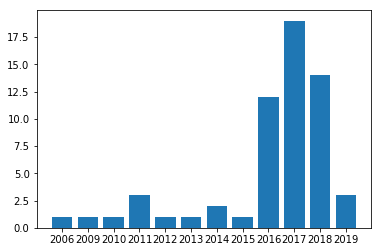

In [85]:
year_list = list(year_count.keys())
year_list.sort()
print(year_list)
len_year_list = len(year_list)
print(len_year_list)
count_list = []
for year in year_list:
    count_list.append(year_count[year])
    
min_year = year_list[0]
max_year = year_list[-1]
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos = range(0, len_year_list, 1)

# Create bars
plt.bar(y_pos, count_list)
 
# Create names on the x-axis
plt.xticks(y_pos, year_count)
 
# Show graphic
#plt.show()
out_path = os.path.join(base_path, 'output')
fout_name = 'Author_publication_count.xlsx'
fout_name_total = os.path.join(out_path, fout_name)
plt.savefig('year_count.jpeg')



<function matplotlib.pyplot.show(*args, **kw)>

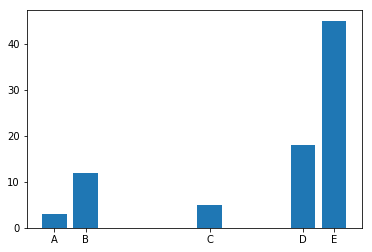

In [74]:
# library
import matplotlib.pyplot as plt
 
# Make fake dataset
height = [3, 12, 5, 18, 45]
bars = ('A', 'B', 'C', 'D', 'E')
 
# Choose the position of each barplots on the x-axis (space=1,4,3,1)
y_pos = [0,1,5,8,9]
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show